In [1]:
from pandas import read_csv


In [2]:
data=read_csv("https://milliams.com/courses/applied_data_analysis/linear.csv")

In [3]:
# x is used for independent variables (inputs) and y is used for dependent variables (outputs)

In [4]:
data.head()

,x,y
0,3.745401,3.229269
1,9.507143,14.185654
2,7.319939,9.524231
3,5.986585,6.672066
4,1.560186,-3.358149


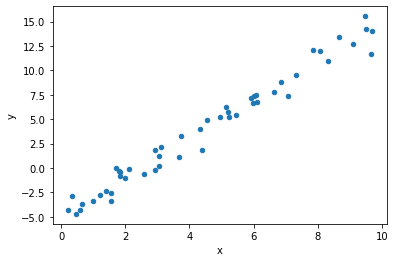

In [5]:
data.plot.scatter("x","y")

In [6]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression(fit_intercept=True)
model.fit(data[["x"]], data["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
from pandas import DataFrame


In [25]:
from pandas import DataFrame

x_fit = DataFrame([data["x"].min(), data["x"].max()])
y_pred = model.predict(x_fit)



In [26]:
model.coef_

array([1.9776566])

In [27]:
model.intercept_


-4.903310725531112

In [31]:

from sklearn.datasets import load_diabetes

diabetes = DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
diabetes["target"] = load_diabetes().target

In [32]:
#correlation is not simply linear realtion but how two variables are related; if we know one variable hwo much do we know about another

In [34]:
import numpy as np

In [44]:
a= np.arange(100)
b= np.arange(100)*-2

In [45]:
df=DataFrame({"a": a,"b": b})

In [46]:
df.head()
df.describe()

,a,b
count,100.000000,100.000000
mean,49.500000,-99.000000
std,29.011492,58.022984
min,0.000000,-198.000000
25%,24.750000,-148.500000
50%,49.500000,-99.000000
75%,74.250000,-49.500000
max,99.000000,0.000000


In [47]:
df.corr()

,a,b
a,1.0,-1.0
b,-1.0,1.0


In [59]:
from sklearn.datasets import fetch_california_housing
housing_data= fetch_california_housing()

In [61]:
housing=DataFrame(data=housing_data.data,columns= housing_data.feature_names)

In [73]:
corr=housing.corr()

In [74]:
import seaborn as sns

In [78]:
cmap=sns.diverging_palette(10,220,as_cmap=True)

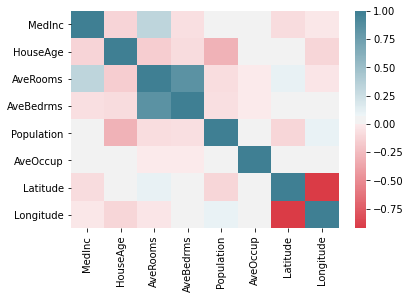

In [79]:
sns.heatmap(corr,cmap=cmap)

In [81]:
from pandas.plotting import scatter_matrix

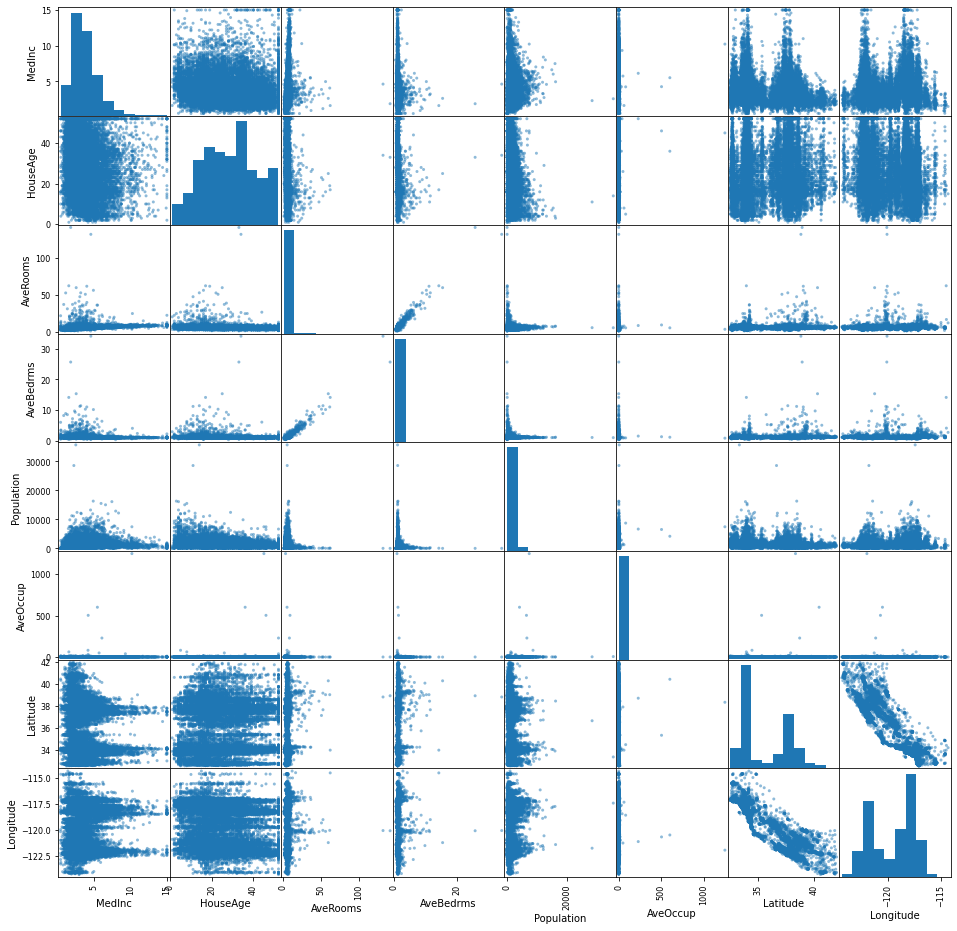

In [90]:
sm=scatter_matrix(housing,figsize=(16,16))

sm


In [124]:
#having lots of highly correlated data like AveBedroom and AveRooms when traing the data makes it solwer and doesn't improve the model much. Sometimes it actually makes it slower

In [125]:
#Clustering

In [126]:
from sklearn.datasets import make_blobs
data, true_labels =make_blobs(n_samples = 500, centers=4, random_state=6)

In [127]:
points = DataFrame(data, columns=["x1","x2"])

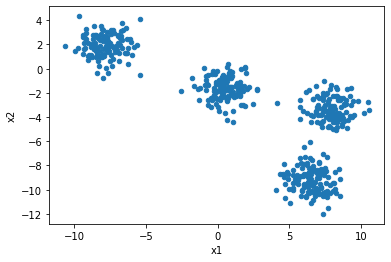

In [128]:
points.plot.scatter("x1","x2")

In [133]:
from sklearn.cluster import KMeans

In [134]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(points)

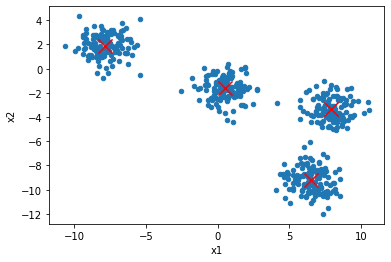

In [136]:
cluster_centers = DataFrame(kmeans.cluster_centers_, columns=["x1", "x2"])
cluster_centers
ax = points.plot.scatter("x1", "x2")
cluster_centers.plot.scatter("x1", "x2", ax=ax, c="red", s=200, marker="x")

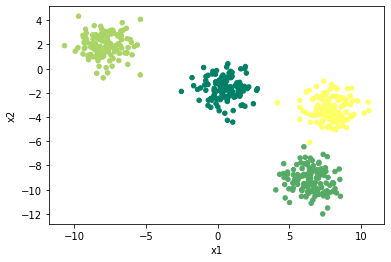

In [147]:
points.plot.scatter("x1", "x2", c=kmeans.labels_, colormap="summer", colorbar=False)

In [151]:
from sklearn.datasets import load_iris

In [157]:
iris=DataFrame(data=load_iris().data,columns=load_iris().feature_names)

In [158]:
num_iris_species = len(load_iris().target_names)

In [159]:
kmeans=KMeans(n_clusters=num_iris_species).fit(iris)

In [ ]:
points.plot.scatter("x1", "x2", c=kmeans.labels_, colormap="summer", colorbar=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6606F0850>,
      dtype=object)

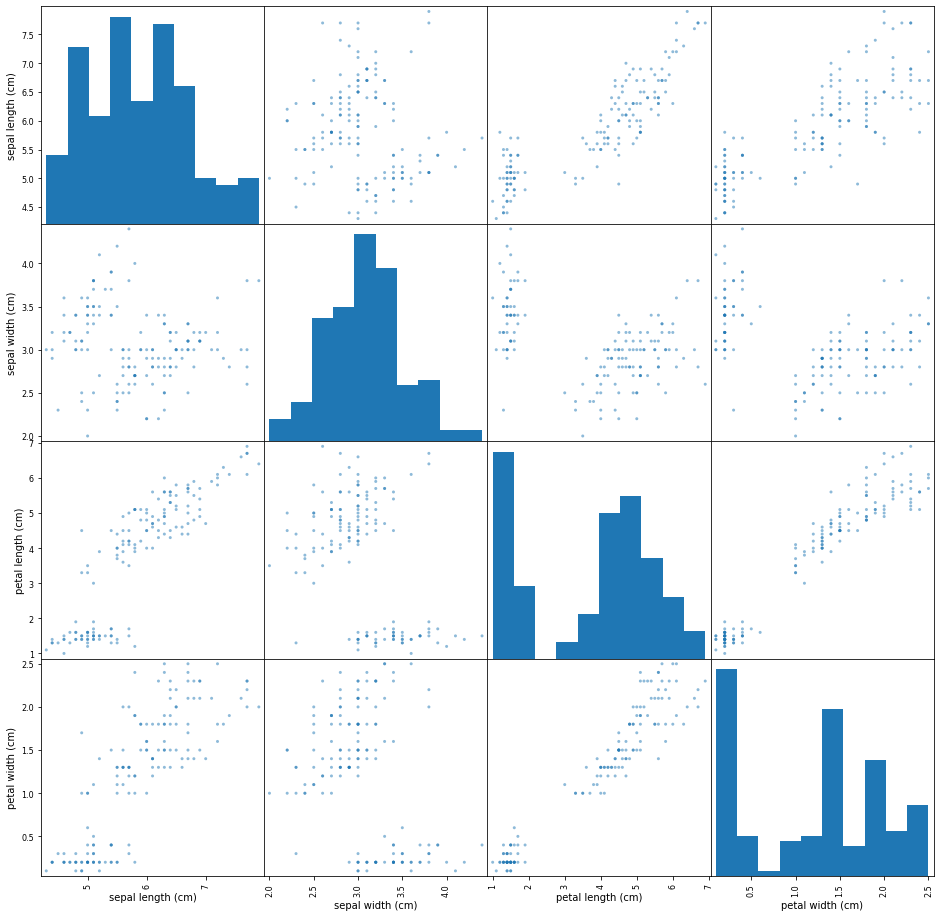

In [161]:
scatter_matrix(iris,cmap=cmap,figsize=(16,16))

In [162]:
kmeans.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [164]:
from skimage import io

photo = io.imread("https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Swallow-tailed_bee-eater_%28Merops_hirundineus_chrysolaimus%29.jpg/768px-Swallow-tailed_bee-eater_%28Merops_hirundineus_chrysolaimus%29.jpg")

print("Shape is", photo.shape)
print("Size is", photo.size)

Shape is (768, 768, 3)
Size is 1769472


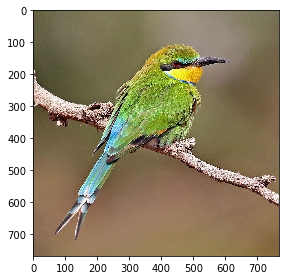

In [165]:
%matplotlib inline
io.imshow(photo)

In [166]:
import numpy as np

photo = np.array(photo, dtype=np.float64) / 255  # Scale values
w, h, d = original_shape = tuple(photo.shape)  # Get the current shape
image_array = np.reshape(photo, (w * h, d))  # Reshape to to 2D

In [167]:
pixels = DataFrame(image_array, columns=["Red", "Green", "Blue"])

In [188]:
def hex_encode(rgb):
    """Transform an RGB tuple to a hex string (html color)"""
    r = int(rgb[0] * 255)
    g = int(rgb[1] * 255)
    b = int(rgb[2] * 255)
    return '#%02x%02x%02x60' % (r, g, b)


pixels["colour"] = [hex_encode(p) for p in image_array]

In [189]:
pixels_sample = pixels.sample(frac=0.05)

In [190]:
import matplotlib.pyplot as plt


def plot_colours(df, c1, c2, c3):
    """
    Given a DataFrame and three column names,
    plot the pairs against each other
    """
    fig, ax = plt.subplots(1, 3)
    fig.set_size_inches(18, 6)
    df.plot.scatter(c1, c2, c=df["colour"], ax=ax[0])
    df.plot.scatter(c1, c3, c=df["colour"], ax=ax[1])
    df.plot.scatter(c2, c3, c=df["colour"], ax=ax[2])
    fig.show()
    
    plot_colours(pixels_sample, "Red", "Green", "Blue")

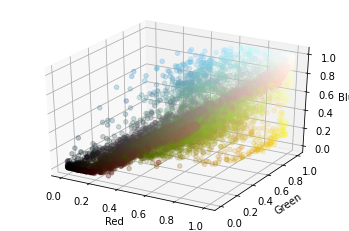

In [191]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
ax.scatter(pixels_sample["Red"], pixels_sample["Green"], pixels_sample["Blue"], c=pixels_sample["colour"])

In [184]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10).fit(pixels_sample[["Red", "Green", "Blue"]])

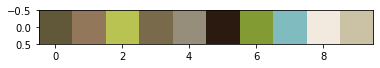

In [192]:
plt.imshow([kmeans.cluster_centers_])

In [193]:
labels = kmeans.predict(pixels[["Red", "Green", "Blue"]])
labels

array([0, 0, 0, ..., 3, 3, 3])

In [194]:
reduced = np.array([kmeans.cluster_centers_[p] for p in labels]).reshape(original_shape)

Text(0.5, 1.0, 'RGB clustered')

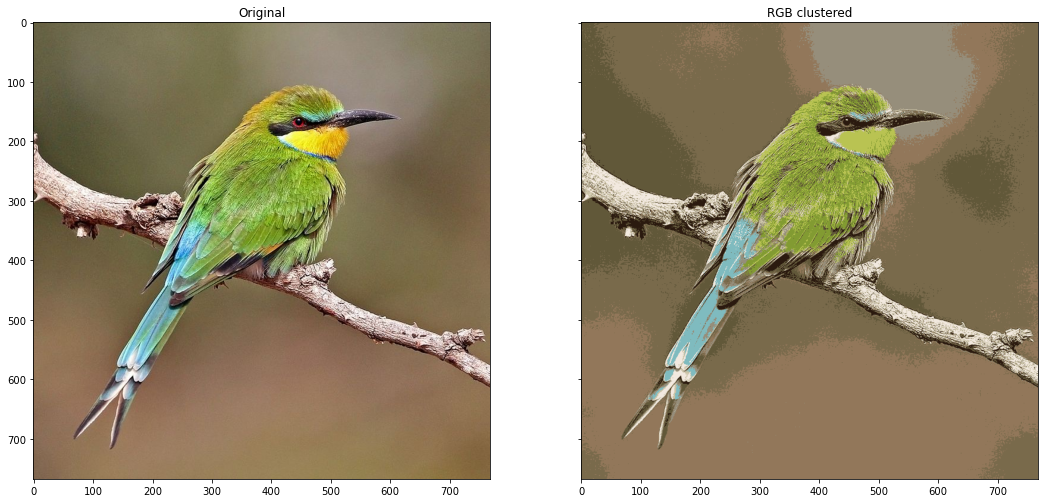

In [195]:
f, axarr = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 9))
axarr[0].imshow(photo)
axarr[0].set_title("Original")
axarr[1].imshow(reduced)
axarr[1].set_title("RGB clustered")

In [ ]:
%matplotlib inline
from skimage.color import rgb2lab, lab2rgb

photo_lab = rgb2lab(photo)  # This is where we convert colour space
w, h, d = original_shape = tuple(photo_lab.shape)
image_array_lab = np.reshape(photo_lab, (w * h, d))

pixels_lab = DataFrame(image_array_lab, columns=["L", "a", "b"])

pixels_lab["colour"] = [hex_encode(p) for p in image_array]
pixels_sample_lab = pixels_lab.sample(frac=0.05)

plot_colours(pixels_sample_lab, "L", "a", "b")

In [ ]:
kmeans_lab = KMeans(n_clusters=10).fit(pixels_sample_lab[["L", "a", "b"]])
plt.imshow(lab2rgb([kmeans_lab.cluster_centers_]))

In [ ]:

labels_lab = kmeans_lab.predict(pixels_lab[["L", "a", "b"]])  # Assign pixels to the cluster centre
centers_lab = lab2rgb([kmeans_lab.cluster_centers_])[0]  # Get the RGB of the cluster centres
reduced_lab = np.array([centers_lab[p] for p in labels_lab]).reshape(original_shape)  # Map and reshape
io.imshow(reduced_lab)

In [ ]:
f, axarr = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(18, 6))
axarr[0].imshow(photo)
axarr[0].set_title("Original")
axarr[1].imshow(reduced)
axarr[1].set_title("RGB clustered")
axarr[2].imshow(reduced_lab)
axarr[2].set_title("Lab clustered")